# Hough Transform

This notebook demonstrates the hough transform using the implementation provided by `scikit-image`.

In [1]:
import numpy as np

from PIL import Image
from skimage.transform import hough_line, hough_line_peaks, resize
from skimage.feature import canny
from skimage.draw import line
from skimage import data
from skimage.color import rgb2gray, rgba2rgb

import matplotlib.pyplot as plt
from matplotlib import cm

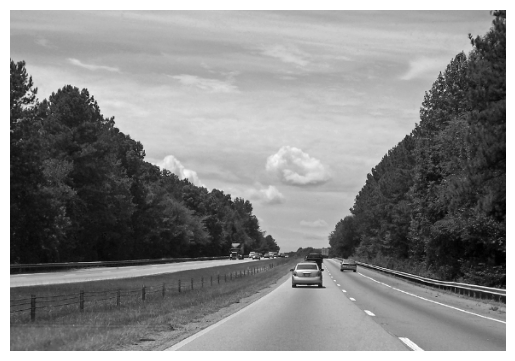

In [7]:
# Load the image and perform canny edge detection
img = Image.open('img/highway.jpg')
img = img.convert('L')

img_np = np.asarray(img)

# Resize image if it is too big
h, w = img_np.shape
ratio = w / h
new_h = 400
new_w = int(new_h * ratio)

img_resized = resize(img_np, (new_h, new_w))
img_arr = img_resized

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img_arr, cmap='gray')
ax.set_axis_off()

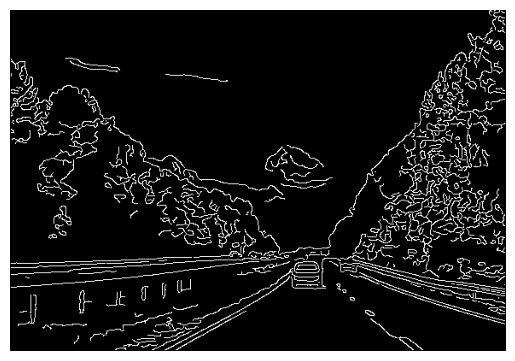

In [8]:
canny_img = canny(img_arr, sigma=1.4)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(canny_img, cmap='gray')
ax.set_axis_off()

In [9]:
angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(canny_img, theta=angles)

Text(0, 0.5, 'Distance (pixels)')

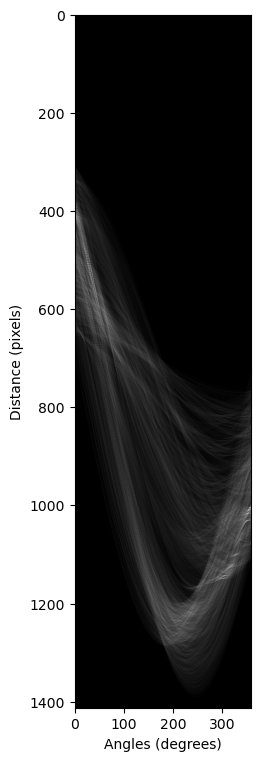

In [10]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.imshow(h, cmap='gray')
ax.set_xlabel("Angles (degrees)")
ax.set_ylabel("Distance (pixels)")

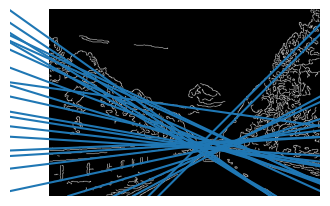

In [12]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(111)
ax.imshow(canny_img, cmap='gray')
ax.set_axis_off()

for _, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=100)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2))